In [1]:
bayesplay::loadpackages()

# Introduction

The aim of this course is to give you an introduction to Bayesian statistics. It is by no means intended to be an exhaustive course, so at the end of it, there will still be a lot for you to learn. However, I do hope that at the end of this workshop you’ll have a better understanding of Bayesian statistics, how it differs from Frequentist approaches, and how to incorporate some Bayesian methods into your research. 

The course will cover several topics, including the foundations of Frequentist and Bayesian approaches to statistics, how to calculate Bayes factors, Bayesian estimation, and Bayesian regression modelling. 

# The *p* value

The American Statistical Association (ASA) defines a *p* value as:

> the probability under a specified statistical model that a statistical summary of the data (e.g., the sample mean difference between two compared groups) would be equal to or more extreme than its observed value ([Wasserstein and Lazar 2016](https://doi.org/10.1080/00031305.2016.1154108))

While this is a perfectly acceptable definition, it is maybe a little tricky to understand. The main reason for this is that the definition contains at least one *ill-defined concept* ("probability") and one tricky concept ("specified statistical model"). To understand what a *p* value really is, we're going to have to unpack both of these ideas. Along the way, we're going to learn about some other concepts that will also help us understand *Frequentist* inference. And a good grounding in Frequentist inference will also help us understand the distinction between Frequentist inference and Bayesian inference. 

## Probability

Most people think of *probability* as a mathematical concept. In a sense it is, but it is also a deeply *philosophical* concept. We deploy the word *probability* in many different *kinds* of situations, and it's not clear whether we mean the same thing in each of them. Some examples of where we use the word probability are when we ask questions like: What is the probability of getting heads on repeated tosses of a fair coin?  What is the probability that it will rain tomorrow? What is the probability the accused committed the crime? The word *probability* seemingly refers to different things in each of these situations. 

For example, we might suggest that the probability of the getting heads is 0.5, where this 0.5 refers to the *long-run relative frequency* of getting heads. That is, if we were to toss a coin many many times then on around 0.5 (i.e., half) of the tosses the coin would come up heads.

We might use a different notion when thinking about the case of somebody accused of a crime. We might say something like, "we are 90% sure" (probability of .9) that the criminal committed the crime. But what does "90% sure" mean. Does it make sense to think of it as the *relative frequency*? If not, then how else might we think of it? We might, for example, think of it as a *credence* or a *degree of belief* that the proposition is true. Or we might think of it as a *degree of support*. That is, we might say that the available evidence supports the hypothesis that the accused committed the crime with odds of 9-to-1.

This list isn't meant to be exhaustive. The aim is just to highlight that we might sometimes mean different things when we think about probability. It pays to keep this in minds as we move through the course. 

## Probability and *p* values

Now that we know that *probability* can mean different things in different situations, what notion of *probability* is at play in ASA's definition of the *p* value? The common view is to say that it refers to *relative frequencies*. But relative frequencies of **what** over repeats of **what**?  

> the p value refers to the relative frequency of obtaining a statistical summary of the data as large or larger than the observed value over hypothetical repeats of an experiment described by a specified statistical model

### Understanding the *p* through simulation

To understand how *p* values work, let's start with a little scenario: 


> You've been given a device that can be used to find buried treasure. The device has a numbered dial on it, and there is a little arrow that can point at these numbers. The indicator never stays still, but swings around a bit. You don't know how the device works, except that it behaves *differently* around treasure compared with when there is no treasure present. How can you use this device to find treasure?

This seems like a hard problem. You know very little about the device. You don't know what it's meant to do when it finds treasure, and you don't know what it's meant to do when there isn't any treasure. So how do you go about using it to find treasure?

#### Finding treasure 

The first step in using the device is to get a good description of what it does when there isn't any treasure around. To do this, you might just take your device somewhere without treasure. You can then just sit and watch the dial. After a long time watching it, you might notice that although the pointer swings around a lot, *on average* it points at zero. This one bit of information is enough to develop a treasure hunting strategy using this device. 

The first step in the strategy is deciding how many readings to take on each hunt. Because the pointer swings around a lot, we'll need to take a couple of readings and then use these to work out an average (which we'll call $\bar{x}$). We're in a hurry so we'll take **10** readings on each hunt. 

Next, we'll need to scale our average. If our average is 1, then is this close to 0? How about 0.5? Or 5? Or 15? It's impossible to know because you don't know how big the average range of the dial's swings. So your scaling factor should be proportional to the magnitude of the average deviations you've observed (we'll call this scaling factor $s_{\bar{x}}$).

With this information in hand, we have enough to build a statistical model of our device's behaviour. To do this, we just go where there is no treasure and perform the following steps: 1) Take 10 readings; 2) work out an average ($\bar{x}$); 3) scale it by our scaling factor ($s_{\bar{x}}$); write down our scaled measurement (which we'll call $t$), and repeat!  Once we've done this many many times, then we'll have a nice distribution or statistical model of how our device behaves when there isn't any treasure. Of course, we don't have to do this for real. We can just simulate it! Feel free to play around with the simulation, to change the numbers, and to see how this influences our statistical model. 


In [2]:
# 1
# run this chunk to set up the simulation function

set.seed(612) # Set the seed for reproducibility

run.exp = function(sample_size, average){
  # define function for running and experiment
  
      
    # we don't know how much the pointer actually swings around,
    # so lets just pick a random range between 1 and 10!
    dev = runif(1,1,10); min_possible = 0 -dev; max_possible = 0 + dev
  
    # generate a sample of readings
    this_sample = runif(sample_size, min_possible, max_possible)
  
  # make descriptive stats
  tibble::tibble(sample_mean = mean(this_sample), 
                 sample_sd = sd(this_sample), 
                 n = sample_size,
                 se = sample_sd / sqrt(sample_size))
}

In [3]:
# 2
# run this chunk to actually run the simulations!

# set up to run in parallel
inParallel = FALSE #  set to TRUE for local or FALSE for cloud
if(inParallel){
future::plan(multiprocess)
no_of_exps = 100000 # Set the number of experiments to simulate
map_df <- furrr::future_map_dfr
} else {
   no_of_exps =  1000
}


all_exps <- map_df(1:no_of_exps, function(x) 
  run.exp(sample_size = 10, average = 0) %>% dplyr::mutate(i = x)) # run the experiments

dplyr::glimpse(all_exps) # view the results

Observations: 100,000
Variables: 5
$ sample_mean <dbl> -0.349855590, -1.432799139, 0.066831693, 0.328333181, 0.5…
$ sample_sd   <dbl> 2.2242868, 5.5490204, 2.0153700, 2.4711392, 3.5081624, 1.…
$ n           <dbl> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1…
$ se          <dbl> 0.7033812, 1.7547543, 0.6373160, 0.7814428, 1.1093784, 0.…
$ i           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…


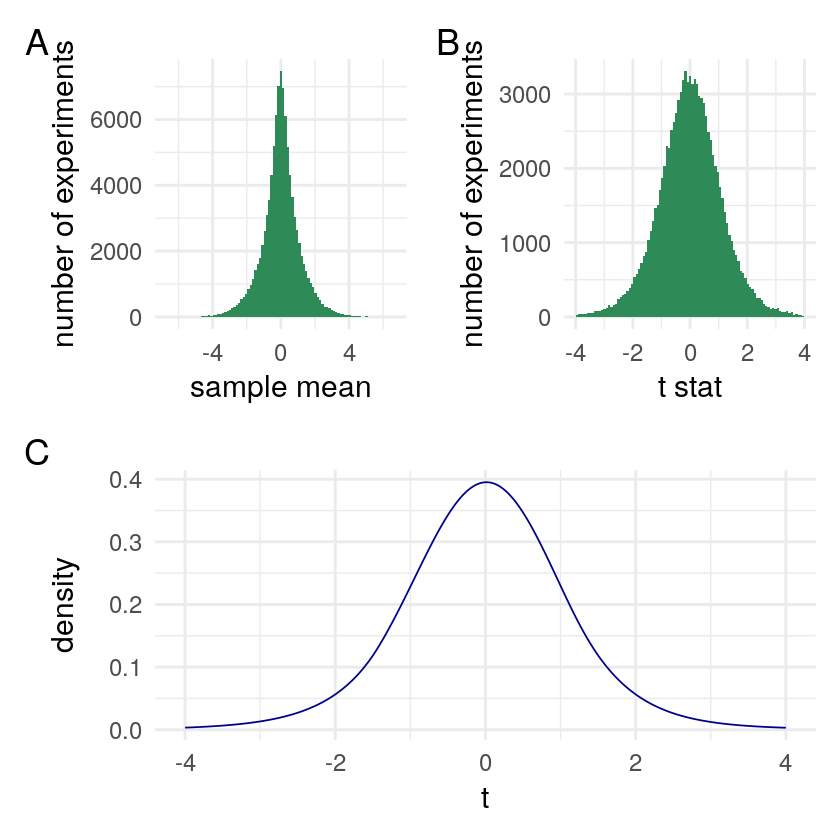

In [4]:
# 3
# run this chunk to view some plots of our simulations
all_exps = all_exps %>% mutate(t = (sample_mean * sqrt(n)) / sample_sd)

# make a histogram of the unscaled averages
all_exps %>% ggplot(aes(x = sample_mean)) + geom_histogram(fill = "seagreen",bins = 100, na.rm = TRUE) +
  labs(x = "sample mean", y = "number of experiments") + 
  xlim(c(-max(abs(all_exps$sample_mean)) * 1.10, max(abs(all_exps$sample_mean)) * 1.10)) +
  theme_minimal(18) -> mean_hist

# make a histograme of the scaled averages
all_exps %>% ggplot(aes(x = t)) + geom_histogram(fill = "seagreen", bins = 100, na.rm = TRUE) +
  labs(x = "t stat", y = "number of experiments") + xlim(c(-4,4)) +
  theme_minimal(18) -> t_hist

# convert the histogram of the scaled averages to a probability density
tibble(x = seq(-4, 4, length.out = 10000)) %>% 
  mutate(y = dlogspline(x,logspline(all_exps$t))) %>%
  ggplot(aes(x = x, y = y)) + geom_line(colour = "darkblue") +
  labs(x = "t", y = "density") + xlim(c(-4,4)) +
  theme_minimal(18) -> density_plot


((mean_hist | t_hist) / density_plot ) + plot_annotation(tag_levels = "A")

#### Using our device 

We can use our statistical model of our device (our distribution of *t* values) to come up with a method for finding treasure. Our statistical model tells us what readings we'll see when **we haven't found treasure** and **how often** we'll see those readings. In the absence of treasure we'll see readings near the middle of the distribution very often and readings near the tails of the distribution less often. We might even say that, in the absence of treasure, it would be pretty **surprising** to see an extreme reading. Now we don't know anything about how the device behaves when it's around treasure, but we know what readings would be *surprising* if it **wasn't** around treasure. 

We can use this fact to come up with a treasure hunting rule. When you see a **surprising** reading, dig for treasure. When you see an **unsurprising** reading, move on to the next spot. Let's try it out! 

In [5]:
# 4
# trying out our treasure hunting device
set.seed(151); X = rnorm(10, runif(1,-10,10), runif(1));

x_bar = mean(X) # work out an average
s_x_bar = sd(X)/sqrt(length(X)) # work out the scaling factor
t_value = x_bar / s_x_bar # work out the scaled measurement 

glue::glue("Our {length(X)} measurements are: {glue::glue_collapse(round(X,2),sep = '; ')}  
           Our $\\bar{{x}}$ = {round(x_bar,3)}  
           Our $s_\\bar{{x}}$ = {round(s_x_bar,3)}      
This means that our scaled measurement, $t$ = {round(t_value,3)}") %>% 
IRdisplay::display_markdown()

Our 10 measurements are: 0.25; -0.54; -0.51; -0.75; 0.27; -1.62; -1.29; -0.21; 0.17; -0.83  
           Our $\bar{x}$ = -0.507  
           Our $s_\bar{x}$ = 0.204      
This means that our scaled measurement, $t$ = -2.485

Once we have our scaled reading, we can ask how **surprising** it is. To do this, we just compare it against the distribution of measurements that we generated when we weren't around treasure.

In [6]:
# 5
# how surprising is our measurement

# first convert it to an absolute value
t_value = abs(t_value)

larger_than_positive = mean(all_exps$t > t_value)
smaller_than_negative = mean(all_exps$t < -t_value)

further_from_zero = larger_than_positive + smaller_than_negative
closer_to_zero = 1 - further_from_zero

glue::glue("{round(closer_to_zero * 100,2)}% of values from our simulation where closer to zero than our current value.   
Only {round(further_from_zero * 100, 2)}% of values where further from zero than our current value.") %>%
IRdisplay::display_markdown()

96.15% of values from our simulation where closer to zero than our current value.   
Only 3.85% of values where further from zero than our current value.

Once we have a measurement of how surprising our value is, then we just need to set a threshold for when it's surprising enough to warrant digging. We'll call this threshold $\alpha$, and we'll set it to 5% (for literally no reason in particular).  

Now let's try using the rule. We'll do another simulation. We'll simulate many many hunts, and on each hunt there either will be treasure or there won't be treasure. Treasure will occur with the probability of $Pr_{\mathrm{treasure}}$. We won't know this value, because we'll just randomly set it. For each hunt, we'll note done whether the rule told us to dig or move one. And we'll also record the ground truth to test the accuracy. 

In [15]:
# 6
# testing our rule
set.seed(14) # set seed for reproducibly
if(inParallel){
n_tests = 10000 # set the number of tests
} else {
n_tests = 1000    
}
Pr_treasure = runif(1) # Set the probablity of finding treasure

simulate_hunt <- function(Pr_treasure){
    
    # Decide whether this hunt has treasure
    has.treasure = ifelse(runif(1) < Pr_treasure, 0, 1) 
    
    X = rnorm(10, has.treasure, 1.5) # generate 10 readings
    
    # work out the scaled measurement and how suprising it is
    # and decide whether to dig or not!
    t.test(X) %>% broom::tidy() %>%
  mutate(has.treasure = ifelse(has.treasure == 1, "Y","N"), 
         how.suprising = p.value, 
         dig = ifelse(p.value < 0.05, "Y","N")) %>%
  select(has.treasure, dig)
    
}

set.seed(11) # set seed for reproducibly
test_hunts = map_df(1:n_tests, function(x) simulate_hunt(Pr_treasure)) 

In [8]:
# 7
# look at the results of tests

test_hunts %>% slice(1:20) %>% knitr::kable(format = "html", 
                                            col.names = c("Had treasure?","Dig or not?")) %>% 
as.character() %>% IRdisplay::display_html()


Had treasure?,Dig or not?
N,N
N,N
N,N
N,N
Y,Y
N,N
Y,Y
N,N
Y,Y
N,N


To asses the usefulness of our rule, we can evaluate the accuracy of our rule. There are a few ways to do this. We can look at overall accuracy. We can look at how often we missed treasure when there was treasure. We can look how often dug for treasure when there wasn't any. Let's take a look at some metrics.

In [9]:
#8 

# function for computing metrics
get_metrics = function(test_hunts){
    test_hunts %<>% mutate(type = case_when(has.treasure == "Y" & dig == "Y" ~ "Hit", 
                                            has.treasure == "Y" & dig == "N" ~ "Miss",
                                            has.treasure == "N" & dig == "N" ~ "Correct Rejection",
                                            has.treasure == "N" & dig == "Y" ~ "False alarm"))

    metrics = test_hunts %>% 
    mutate(type = factor(type,levels = c("Hit","Miss","Correct Rejection","False alarm"))) %>% 
    group_by(type, `.drop` = FALSE) %>% summarise(n = n()) %>% mutate(type = as.character(type)) %>%
    pivot_wider(names_from = "type", values_from = "n") %>% 
    mutate(Correct = `Correct Rejection` + Hit, 
       Incorrect = `False alarm` + Miss, 
       Accuracy = Correct / (Correct + Incorrect)) 

    amount_of_treasure = test_hunts %>% 
    mutate(has.treasure = factor(has.treasure, levels = c("Y","N"))) %>%
    group_by(has.treasure, `.drop` = FALSE) %>% summarise(n = n()) %>%
        spread(key = has.treasure, value = n) %>% 
        set_colnames(c("N" = "No treasure", "Y" = "Treasure")) %>% 
        mutate(`actual Pr_treasure` = `Treasure` / (`No treasure` + `Treasure`))

    cbind(metrics,amount_of_treasure)
    
    
}


In [10]:
# 9
# Get some metrics for your simulated hunt
test_hunts %>% get_metrics()

Hit,Miss,Correct Rejection,False alarm,Correct,Incorrect,Accuracy,No treasure,Treasure,actual Pr_treasure
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1191,1365,7085,359,8276,1724,0.8276,2556,7444,0.7444


The rule seems to work pretty well in terms of accuracy. But how much is accuracy dependent on the actual probability of finding treasure? Let's run two more quick simulations where we set the probability of treasure actually being present to 1 or 0. 


In [16]:
# 10 
test_hunts_nothing =  map_df(1:n_tests, function(x) simulate_hunt(0)) 
test_hunts_nothing %>% get_metrics()                                    

Hit,Miss,Correct Rejection,False alarm,Correct,Incorrect,Accuracy,No treasure,Treasure,actual Pr_treasure
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
4728,5272,0,0,4728,5272,0.4728,10000,0,0


In [17]:
# 11
test_hunts_everywhere = map_df(1:n_tests, function(x) simulate_hunt(1))
test_hunts_everywhere %>% get_metrics()

Hit,Miss,Correct Rejection,False alarm,Correct,Incorrect,Accuracy,No treasure,Treasure,actual Pr_treasure
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
0,0,9492,508,9492,508,0.9492,0,10000,1


But maybe just looking at accuracy isn't the best. After all, there are two ways in which we can be wrong. We can dig when we're not meant to, and we can move on when there's actually treasure. So let's split that accuracy percentage (or rather the [1 - accuracy] or "error" percentage) into two: 1) Digging when there's no treasure, and 2) moving on without digging when there was treasure. Now let's adjust $Pr_{\mathrm{treasure}}$ and see how the two error rates fare. 


In [18]:
# 12 
get_metrics2 = function(.data){
    .data %>% mutate(`False alarm rate` = `False alarm`/(`No treasure` + `Treasure`),
                            `Miss rate` = `Miss` / (`No treasure` + `Treasure`))
}


test_hunts_nothing %>% get_metrics() %>% get_metrics2()
test_hunts_everywhere %>% get_metrics() %>% get_metrics2()

Hit,Miss,Correct Rejection,False alarm,Correct,Incorrect,Accuracy,No treasure,Treasure,actual Pr_treasure,False alarm rate,Miss rate
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
4728,5272,0,0,4728,5272,0.4728,10000,0,0,0,0.5272


Hit,Miss,Correct Rejection,False alarm,Correct,Incorrect,Accuracy,No treasure,Treasure,actual Pr_treasure,False alarm rate,Miss rate
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
0,0,9492,508,9492,508,0.9492,0,10000,1,0.0508,0


We can see that no matter what we do, the false positive rate (digging when there's no treasure) never goes above 5%, which is the same value we set for $\alpha$. This is great because it means that we can with certainty set the upper bound of this error rate. And, we can do so knowing nothing about how much treasure there is to be found or how our device works in the presence of treasure. All we need is: 1) to know that *on average* the device points as zero when there's no treasure around and 2) to sit and watch the device for a long time and just record some scaled measurements that the device produces. In fact, we don't even need to do (2). We can just *pretend* to this by simulating the results, and we only need to input **one parameter**—that value we need for step 1. Everything else can just be made up. 

I'm not going to talk much about the other error rate, because this isn't a course of frequentist inference. But we can estimate it based on some assumptions about how the device behaves *in the presence of treasure*. For example, if we know that treasure of a certain values results in the device pointing on average at 1, then we can calculate the **upper bound** of missing treasures smaller than that value. 

Limiting our error rates this way is pretty good, but we can do even better if we change the scenario a little. Let's say that instead of hunting randomly for treasure, we're sent shipments that contain collections of treasure boxes. For these collections, one of two things is true. Either all the boxes contain treasure or none of the boxes contain treasure. Now all we have to do, is run our device over the boxes and if the device produces "surprisingly large" deviations on more than $(100 \times \alpha)\%$  of boxes we accept the whole lot. If our device indicated "surprisingly large" deviations on fewer than $(100 \times \alpha)\%$  of boxes we send them all back. By doing this, we can **guarantee** that we'll accept exactly 100% of shipments that have treasure and reject exactly 100% of shipments that don't have treasure. And again, we get all this power from just running some *pretend experiments* (simulations). 

## Interim summary 

What this rather long-winded demonstration was meant to show is that *p* values are very good at doing one thing. That thing is, controlling how often we're wrong *in the long run.* Deployed in the right context, we can even ensure that we're **never** wrong. This all comes from a simple process: Setting the value of **one parameter**, running pretend experiments, and then comparing our data at hand to results obtained from our pretend experiments to **judge whether our data is surprising** or not. 

Of course, our treasure-hunting scenario, whether in the first form where we hunt randomly for treasure or in the second form where we examine batches that either do or don't contain treasure, may not be exactly analogous to how science works. These means that deciding whether *p* values are useful or not is going to depend on how closely their real-world use case matches their ideal operating environment.  

# A short note on confidence intervals

I'll mention confidence intervals only briefly, but they follow the *exact* same logic as *p*-values. Let say I collect some measurements, work out the average. I could scale this value with my scaling factor and then turn to my list of results from the pretend experiments to work out my *p* value. However, I can also use the results from the pretend experiments to construct (the very poorly named) confidence interval. 

Looking at my pretend experiments I would see that any scaled values that are more than about 2.23 *t* units from 0 would be surprising. Using this information, I can ask myself the following question: If my device on average pointed at the current sample average, rather than zero, what data values would be surprising? The answer to this is, of course, values that are more than 2.23 *t* units from the sample mean. Having an answer in *t* units isn't very useful. But I know that I converted measurements to *t* units by scaling readings using the scaling factor $s_{\bar{x}}$. This means we can just un-scale the value in *t* units back into raw units using the scaling factor calculated from my sample. This means I can say that any values $\pm  2.23\cdot{}s_{\bar{x}}$ from the sample mean would be surprising. Any values less than this, or in this range, would be unsurprising if my device, on average, pointed at my current sample mean. I could draw a line through these values, pull little tails on this line, and *hey presto* I have  a confidence interval. 

Now just to be clear, just like a *p* value, a confidence interval tells you what values would be surprising/unsurprising on an assumption of a certain value of the parameter. For the *p* value you set the parameter to 0 (or wherever else the device points when no treasure is around). For the confidence interval, I just set the parameter to the value from my current sample. It's exactly the same idea.

Hopefully, this should make it clear what the confidence interval doesn't tell you. It doesn't tell you about the *probability of a parameter falling within a range* (the common misinterpretation). It tells you *frequency with which data from pretend experiments will fall within a particular range on the assumption that the parameter is equal to the observed value*. At no point are we making inferences about **parameters** or **true values** of parameters. We are holding parameters constant, doing pretend experiments, and then judging whether the data we have at hand is surprising or not *in relation to those pretend experiments*.

Now that we're all on the same page about *p* values and confidence intervals, we're aware of their power, and where they get this power from, let's look at some criticisms of *p* values.

